# Efficient Frontier

In [1]:
import  pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import edhec_risk_kit as erk

In [2]:
ind=erk.get_ind_returns()

In [3]:
ind.shape

(1110, 30)

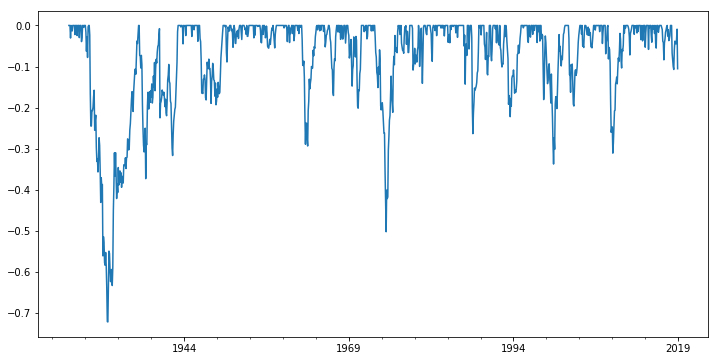

In [4]:
erk.drawdown(ind['Food'])["Drawdown"].plot.line(figsize=(12,6))

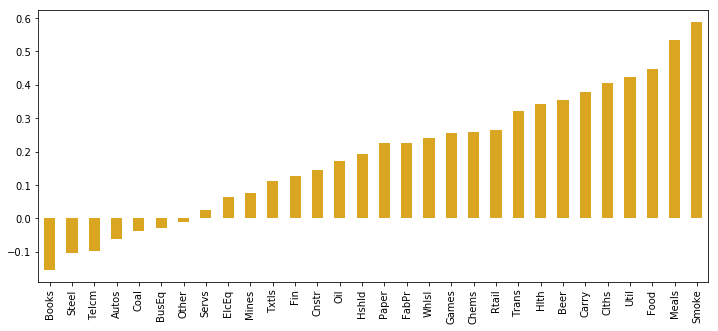

In [5]:
erk.sharpe_ratio(ind["2000":],0.03,12).sort_values().plot.bar(figsize=(12,5),color="goldenrod")

In [26]:
er=erk.annualize_rets(ind["1995":"2000"],12)
er

Food     0.157362
Beer     0.190134
Smoke    0.129288
Games    0.088739
Books    0.200627
Hshld    0.161561
Clths    0.099364
Hlth     0.295218
Chems    0.106504
Txtls   -0.036283
Cnstr    0.118235
Steel    0.115229
FabPr    0.136971
ElcEq    0.291961
Autos    0.094762
Carry    0.237606
Mines   -0.020500
Coal     0.343089
Oil      0.184578
Util     0.172572
Telcm    0.163810
Servs    0.214755
BusEq    0.295745
Paper    0.120336
Trans    0.122916
Whlsl    0.148760
Rtail    0.191885
Meals    0.107844
Fin      0.267598
Other    0.069306
dtype: float64

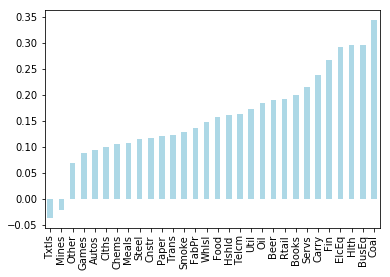

In [7]:
er.sort_values().plot.bar(color="lightblue")

In [8]:
cov=ind["1995":"2000"].cov()

# Efficient Frontier Part II

In [9]:
er=ind["1996":"2000"]
l=["Food","Beer","Smoke","Coal"]
ex=erk.annualize_rets(er[l],12)

In [10]:
cov=er[l].cov()
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [11]:
weights=np.repeat(1/4,4)
erk.portfolio_return(weights,ex)

0.19511097196038385

In [12]:
erk.portfolio_vol(weights,cov.loc[l,l])

0.055059195776437045

# 2 Asset Frontier 

In [13]:
l=["Fin","Beer"]

In [14]:
n_points=20
weights=[np.array([w,1-w]) for w in np.linspace(0,1,n_points)]

In [15]:
er=ind["1996":"2000"][l]
er=erk.annualize_rets(er,12)
cov=ind["1996":"2000"][l].cov()

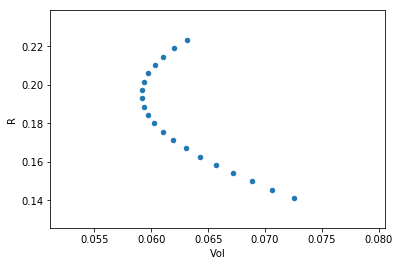

In [16]:
rets=[erk.portfolio_return(w,er) for w in weights]
vols=[erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef=pd.DataFrame({"R":rets,"Vol":vols})
ef.plot.scatter(x="Vol",y="R")

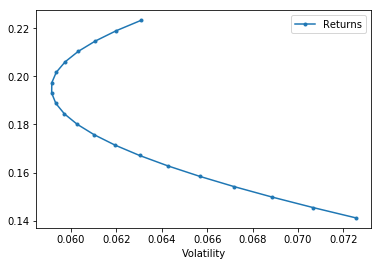

In [17]:
erk.plot_ef2(n_points,er,cov.loc[l,l])

In [18]:
cov.loc[l,l]

,Fin,Beer
Fin,0.003982,0.002571
Beer,0.002571,0.005264


# Multiple Asset Frontier

In [19]:
ind=erk.get_ind_returns()
er=erk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

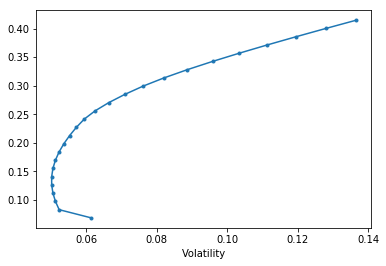

In [20]:
l=["Smoke","Fin","Games","Coal"]
erk.plot_ef(25,er[l],cov.loc[l,l])

In [25]:
er[l]

Smoke    0.107830
Fin      0.223371
Games    0.068212
Coal     0.414689
dtype: float64

In [22]:
cov.loc[l,l]

,Smoke,Fin,Games,Coal
Smoke,0.008349,0.001312,0.000379,-0.000733
Fin,0.001312,0.003982,0.002416,0.002946
Games,0.000379,0.002416,0.003773,0.001888
Coal,-0.000733,0.002946,0.001888,0.018641


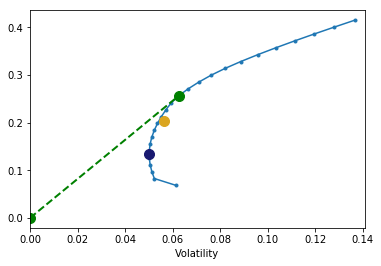

In [23]:
l=["Smoke","Fin","Games","Coal"]
erk.plot_ef(25,er[l],cov.loc[l,l],show_cml=True, show_ew=True, show_gmv=True)

In [24]:
er[l]

Smoke    0.107830
Fin      0.223371
Games    0.068212
Coal     0.414689
dtype: float64